In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as sts # adf test
import statsmodels.graphics.tsaplots as sgt # plot acf

# is intc a random walk? 

In [3]:
df = pd.read_csv('INTC.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-05,48.830002,48.980000,48.020000,48.130001,46.083744,25779200
1,2022-04-06,47.439999,48.169998,47.240002,47.540001,45.518833,31518700
2,2022-04-07,47.430000,47.910000,46.770000,47.560001,45.537979,24117000
3,2022-04-08,47.279999,47.580002,46.849998,47.020000,45.020943,22167300
4,2022-04-11,46.900002,47.299999,46.529999,46.570000,44.590073,30352500
...,...,...,...,...,...,...,...
246,2023-03-29,29.770000,31.889999,29.760000,31.520000,31.520000,85556200
247,2023-03-30,31.850000,32.580002,31.809999,32.090000,32.090000,70077600
248,2023-03-31,31.799999,32.900002,31.730000,32.669998,32.669998,59740100
249,2023-04-03,32.939999,33.560001,32.540001,32.889999,32.889999,57038300


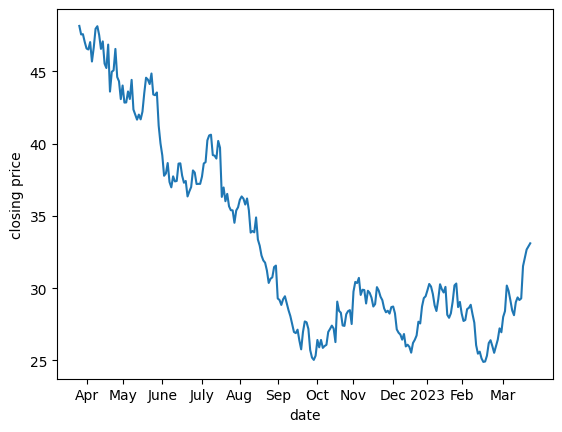

In [15]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])

ax.set_ylabel('closing price')
ax.set_xlabel('date')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 
        'Dec', 2023, 'Feb', 'Mar']
)

plt.show()

We know that in order for a time series to be a random walk:
> it's first difference is stationary and uncorrelated

So let's get the first diff, check if it is stationary with the ADF test, and then check for autocorrelation by graphing ACF

In [18]:
diff_intc = np.diff(df['Close'], n = 1)

In [23]:
adf = sts.adfuller(diff_intc)
print(f'adf statistic {adf[0]}')
print(f'p-value {adf[1]}')

adf statistic -16.78368364771095
p-value 1.2582367525724909e-29


so it's first difference is stationary so if it is uncorrelated we can say it is a random walk

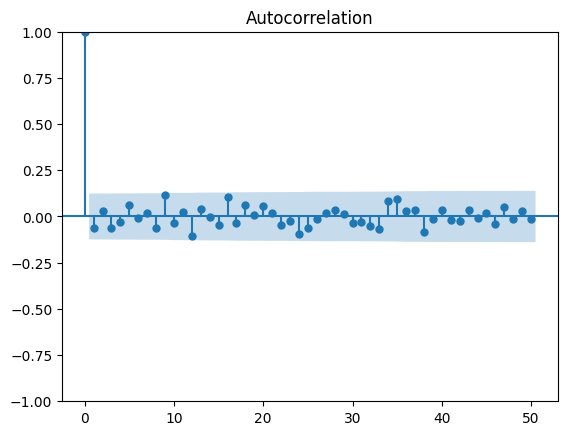

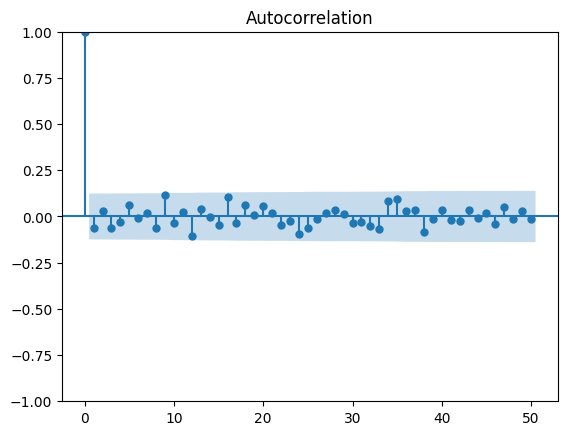

In [25]:
sgt.plot_acf(diff_intc, lags = 50)

here I have a question. All values fall into the confidence interval meaning there is no significant correlation between any of the values. Is this enough to say the series in uncorrelated? If so well, **INTC price is a random walk**